# Scenario Discovery Policies
@author: Mark Hupkens, Date: 29 July 2019

This notebook contains results from the policy experimentation with new subsidy logic. Subsidies have been modelled to be awarded as a percentage of neighbourhood-dependent renovation costs. 

### Importing the necessary Python modules

In [1]:
import thesis_utils as tu # specified own utilities package to make thesis life easier (thesis.utils.py)
import time

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
# import mpld3

from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis.plotting_util import KDE
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from ema_workbench.util import load_results
from ema_workbench.analysis.plotting import lines, plot_lines_with_envelopes, envelopes  

# %matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\LocalAdmin\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:22: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


### Load data

In [2]:
# Select run

fn = 'results/20190726_experiments_policies_v2_100.tar.gz'

results = load_results(fn)
experiments, outcomes = results

[MainProcess/INFO] results loaded succesfully from C:\Users\LocalAdmin\Desktop\ETModel\results\20190726_experiments_policies_v2_100.tar.gz


In [3]:
# divide outcomes by e6 to show outcomes in billion euros
outcomes['total cumulative subsidies awarded'] = outcomes['total cumulative subsidies awarded']  / 1e9

# divide outcomes by e6 to show outcomes in millions of renovated houses
outcomes['total renovated houses'] = outcomes['total renovated houses']  / 1e6

results = experiments, outcomes

In [4]:
# Create shorter policy names for better visualizations

for n, i in enumerate(experiments['policy']):
    if 'Dynamic' in i:
        if '20' in i:
            experiments['policy'][n] = 'Dynamic_20'
        elif '40' in i:
            experiments['policy'][n] = 'Dynamic_40'
        elif '60' in i:
            experiments['policy'][n] = 'Dynamic_60' 
        elif '80' in i:
            experiments['policy'][n] = 'Dynamic_80'
    elif 'Mission' in i:
        if '20' in i:
            experiments['policy'][n] = 'Mission_20' 
        elif '40' in i:
            experiments['policy'][n] = 'Mission_40'
        elif '60' in i:
            experiments['policy'][n] = 'Mission_60'
        elif '80' in i:
            experiments['policy'][n] = 'Mission_80'
            


In [5]:
len(np.unique(experiments['policy']))

13

### Extract policies used in experiments

In [6]:
policies = list(tu.return_experimented_policies(experiments=experiments))
policies

['Static_40',
 'Dynamic_80',
 'Static_80',
 'None',
 'Mission_60',
 'Mission_20',
 'Dynamic_40',
 'Static_60',
 'Dynamic_60',
 'Dynamic_20',
 'Mission_80',
 'Static_20',
 'Mission_40']

### Create subsets of policy combinations

In [7]:
# create subsets of policy combinations

pol_20 = []
pol_40 = []
pol_60 = []
pol_80 = []
pol_dynamic = []
pol_static = []
pol_mission = []

for i in policies:
    if '20' in i:
        pol_20.append(i)
    elif '40' in i:
        pol_40.append(i)
    elif '60' in i:
        pol_60.append(i)
    elif '80' in i:
        pol_80.append(i)
        
for i in policies:
    if 'Dynamic' in i:
        pol_dynamic.append(i)
    elif 'Static' in i:
        pol_static.append(i)
    elif 'Mission' in i:
        pol_mission.append(i)

# sort lists for identical legends
pol_20.append('None')
pol_40.append('None')
pol_60.append('None')
pol_80.append('None')

pol_20.sort()
pol_40.sort()
pol_60.sort()
pol_80.sort()
pol_dynamic.sort()
pol_static.sort()
pol_mission.sort()

## 1. Dynamic policy

### 1.1 CO2

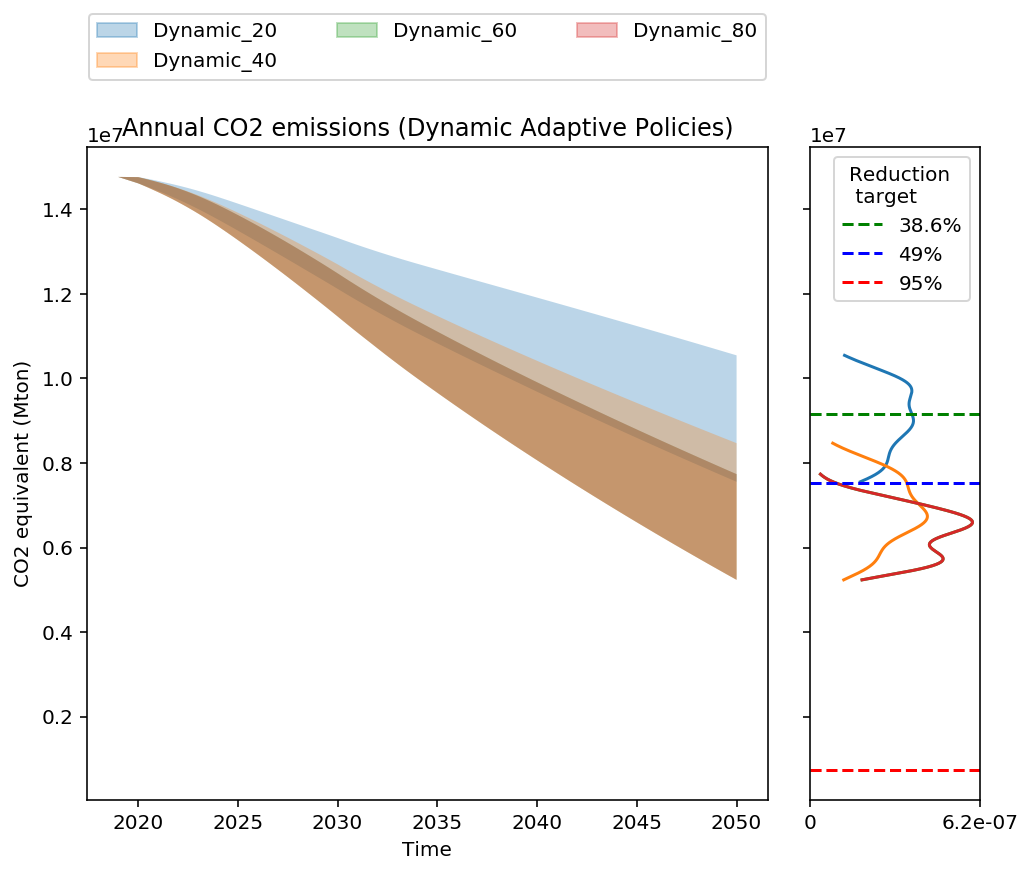

In [8]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total CO2 emission', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_dynamic,
                titles={'total CO2 emission':'Annual CO2 emissions (Dynamic Adaptive Policies)'},
                ylabels={'total CO2 emission':'CO2 equivalent (Mton)'}
                     )

# plot targets  and legend
line1 = plt.axhline(y=(1-.38) * outcomes['total CO2 emission'].max(), color='g', linestyle='--')
line3 = plt.axhline(y=0.05 * outcomes['total CO2 emission'].max(), color='r', linestyle='--')
line2= plt.axhline(y=0.51 * outcomes['total CO2 emission'].max(), color='b', linestyle='--')
plt.legend((line1, line2, line3), ('38.6%','49%', '95%'),title='Reduction \n target',loc='best')
plt.legend()


# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Annual_CO2_emissions_Dynamic_Adaptive_Policies(20-80).png', dpi=300, bbox_inches = "tight")
plt.show()


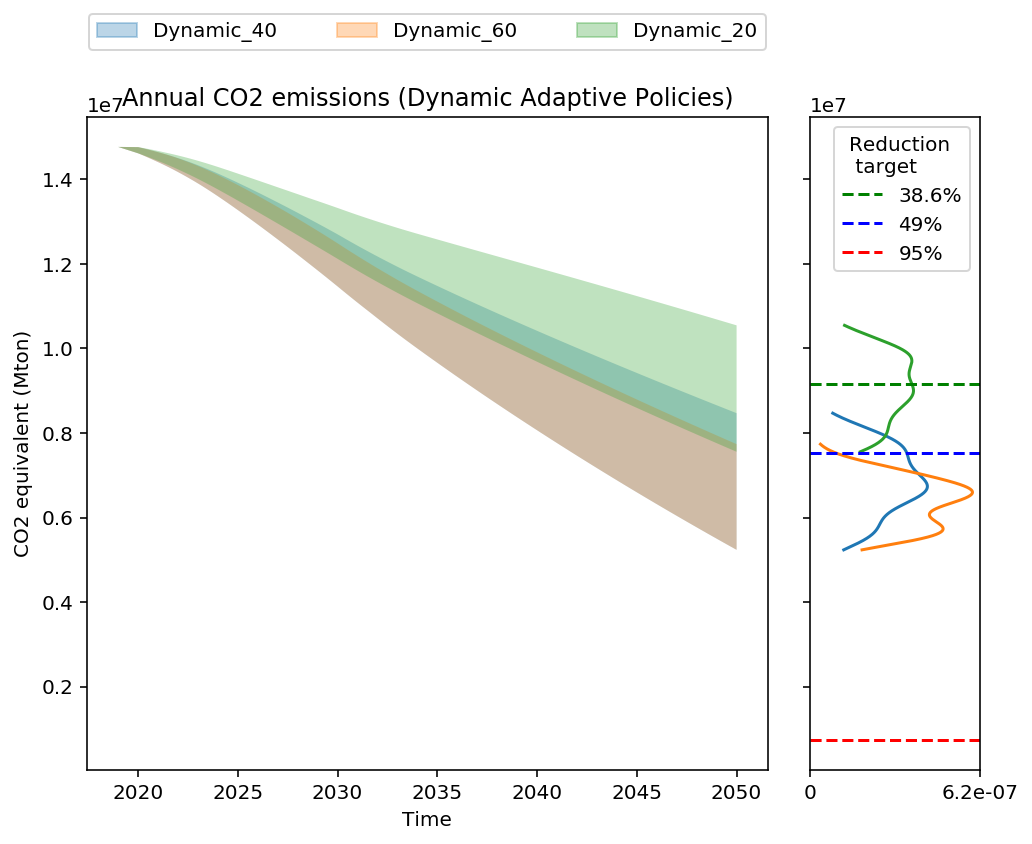

In [9]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total CO2 emission', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= {'Dynamic_20','Dynamic_40', 'Dynamic_60'},
                titles={'total CO2 emission':'Annual CO2 emissions (Dynamic Adaptive Policies)'},
                ylabels={'total CO2 emission':'CO2 equivalent (Mton)'}
                     )
# plot targets  and legend
line1 = plt.axhline(y=(1-.38) * outcomes['total CO2 emission'].max(), color='g', linestyle='--')
line3 = plt.axhline(y=0.05 * outcomes['total CO2 emission'].max(), color='r', linestyle='--')
line2= plt.axhline(y=0.51 * outcomes['total CO2 emission'].max(), color='b', linestyle='--')
plt.legend((line1, line2, line3), ('38.6%','49%', '95%'),title='Reduction \n target',loc='best')
plt.legend()


# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Annual_CO2_emissions_Dynamic_Adaptive_Policies(20-60).png', dpi=300, bbox_inches = "tight")
plt.show()


Within the subset of dynamic policies, it seems that 2 policies show identical results, though, subsidy percentages have been set differently e(0.2-0.8). Subsidies, however, are capped at the renovation costs themselves. Results in this plot are identical for dynamic 60 and 80 percent, because at a 60% subsidie level and at the behindtime CO2 reduction trajectory a doubling multiplier will be active for entire simulation period. Hence, already at the 60% subsidy policy, subsidies are already fully covering renovation costs. A higher subsidy percentage does not effect the annual co2 emissions, because renovation costs have already been fully subsidized in the lower subsidy level.

More interestingly, this implies that subsidies alone are not enough to reach targets. The rate at which houses can be renovated becomes leading right after people have been incentivized to renovate their homes. In these simulations, the renovation rates mentioned in the climate agreement (50k in 2020 to 200k homes in 2030) are adopted. From 2030 onwards an additional increase between 0 and 10% (of the 2030 renovation rate) is sampled as an uncertainty. These graphs on annual CO2 emissions show that these renovation rates are simply too little to renovate all homes by 2050, let alone renovate all of them by 2030.

In [10]:
time = 2030-2019
housesperyear = 200000
renovated_houses = time * housesperyear
renovated_houses

2200000

### 1.2 Annual subsidies

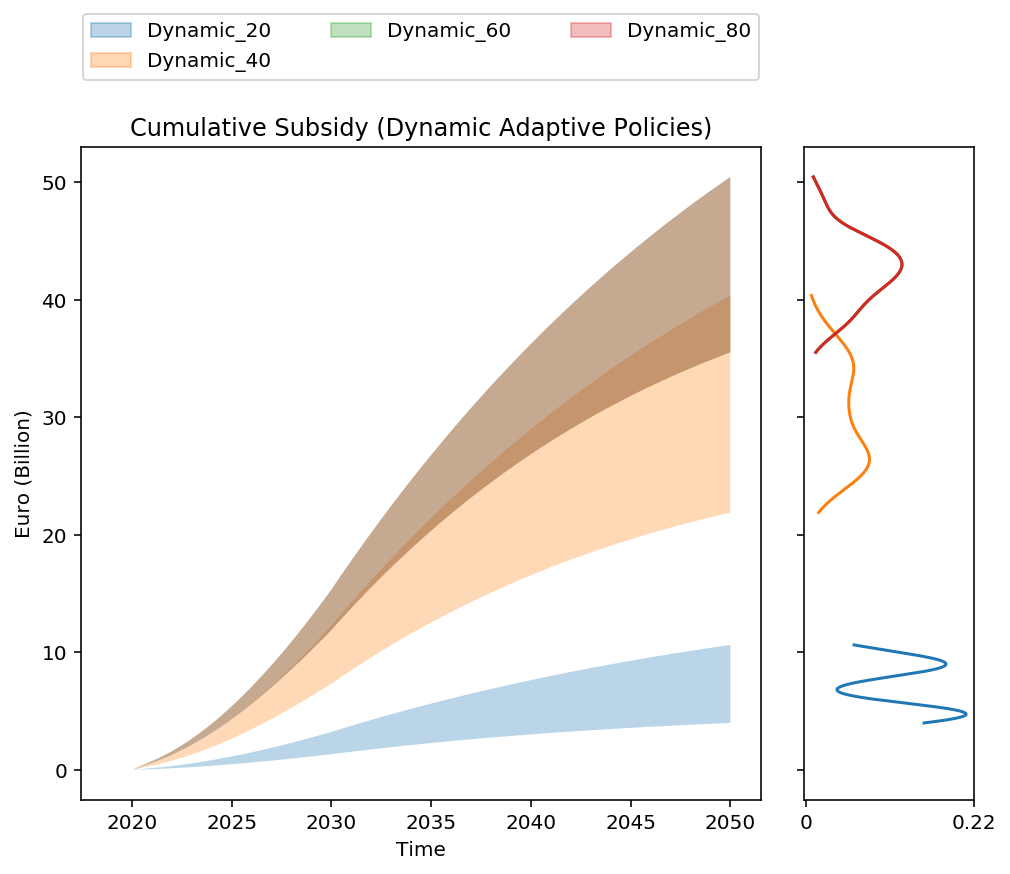

In [11]:
import time
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total cumulative subsidies awarded', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_dynamic,
                titles={'total cumulative subsidies awarded':'Cumulative Subsidy (Dynamic Adaptive Policies)'},
                ylabels={'total cumulative subsidies awarded':'Euro (Billion)'}
                     )
# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_Awarded_Subsidies_(Dynamic_policy).png', dpi=300,bbox_inches = "tight")
plt.show()


## 2. Static policy

### 2.1. CO2

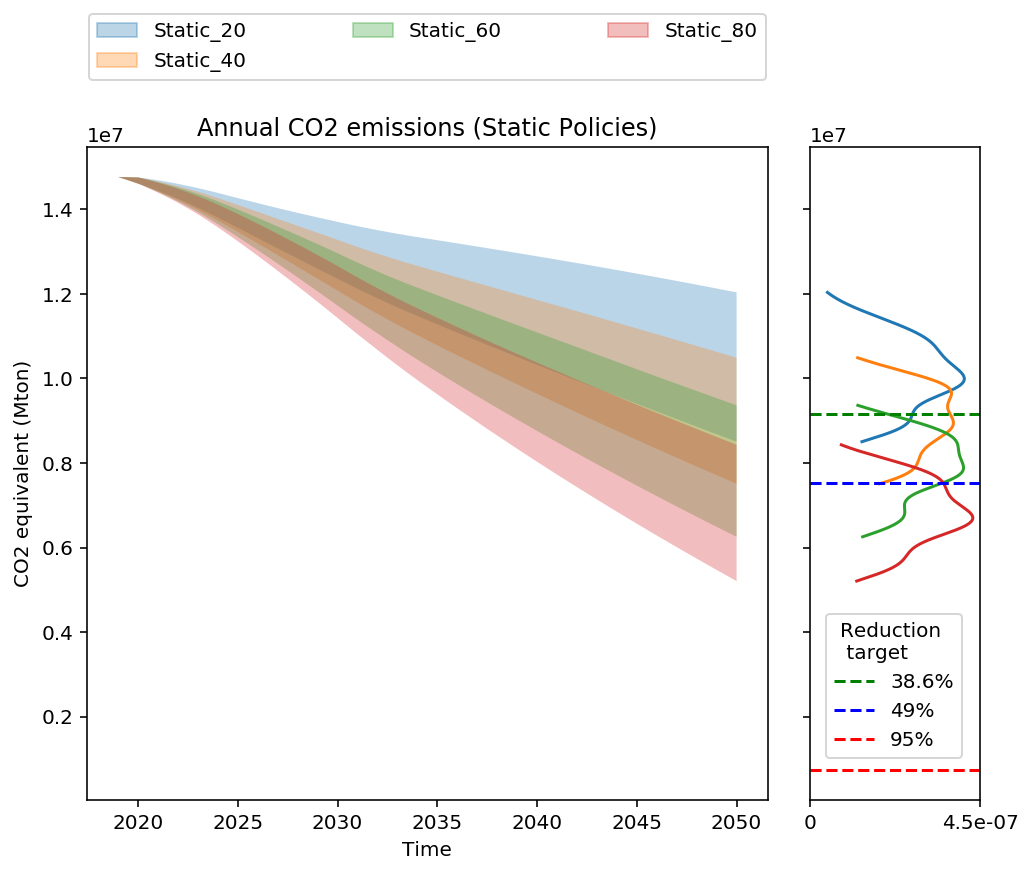

In [12]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total CO2 emission', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_static,
                titles={'total CO2 emission':'Annual CO2 emissions (Static Policies)'},
                ylabels={'total CO2 emission':'CO2 equivalent (Mton)'}
                     )

# plot targets  and legend
line1 = plt.axhline(y=(1-.38) * outcomes['total CO2 emission'].max(), color='g', linestyle='--')
line3 = plt.axhline(y=0.05 * outcomes['total CO2 emission'].max(), color='r', linestyle='--')
line2= plt.axhline(y=0.51 * outcomes['total CO2 emission'].max(), color='b', linestyle='--')
plt.legend((line1, line2, line3), ('38.6%','49%', '95%'),title='Reduction \n target',loc='best',bbox_to_anchor=(0.95,.3))
plt.legend()

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Annual_CO2_emissions_Static_Policies.png', dpi=300, bbox_inches = "tight")
plt.show()


### 2.2. Annual subsidies

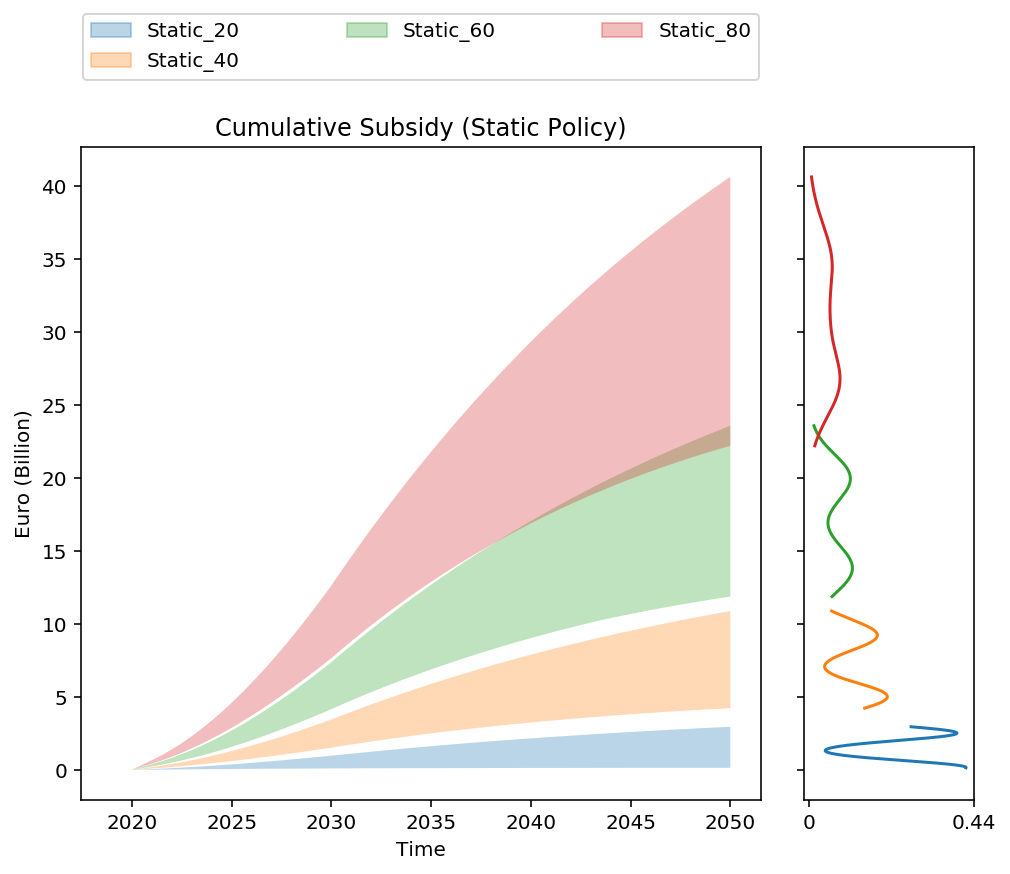

In [13]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total cumulative subsidies awarded', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_static,
                titles={'total cumulative subsidies awarded':'Cumulative Subsidy (Static Policy)'},
                ylabels={'total cumulative subsidies awarded':'Euro (Billion)'}
                     )
# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_Awarded_Subsidies_(Static_policy).png', dpi=300, bbox_inches = "tight")
plt.show()

## 3. Mission policy

### 3.1. CO2

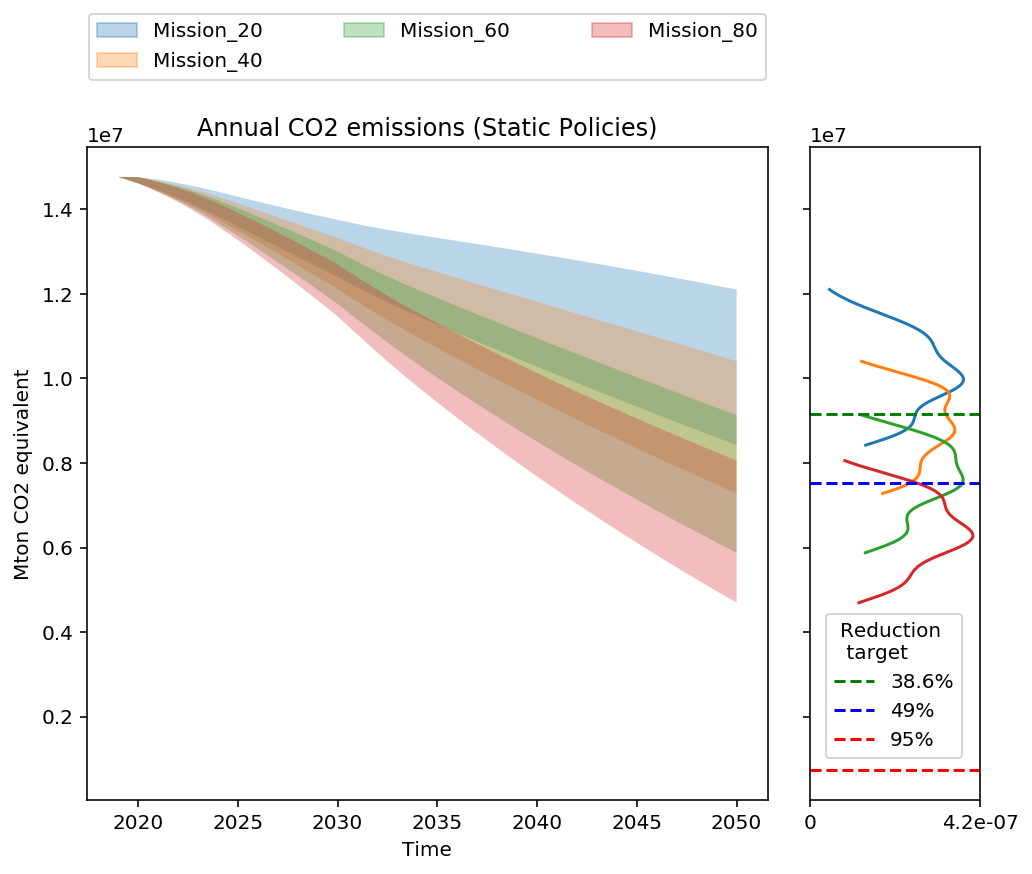

In [14]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total CO2 emission', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_mission,
                titles={'total CO2 emission':'Annual CO2 emissions (Static Policies)'},
                ylabels={'total CO2 emission':'Mton CO2 equivalent'}
                     )

# plot targets  and legend
line1 = plt.axhline(y=(1-.38) * outcomes['total CO2 emission'].max(), color='g', linestyle='--')
line3 = plt.axhline(y=0.05 * outcomes['total CO2 emission'].max(), color='r', linestyle='--')
line2= plt.axhline(y=0.51 * outcomes['total CO2 emission'].max(), color='b', linestyle='--')
plt.legend((line1, line2, line3), ('38.6%','49%', '95%'),title='Reduction \n target',loc='best',bbox_to_anchor=(0.95,.3))
plt.legend()

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Annual_CO2_emissions_Mission_Policies.png', dpi=300, bbox_inches = "tight")
plt.show()

### 3.2. Annual subsidies

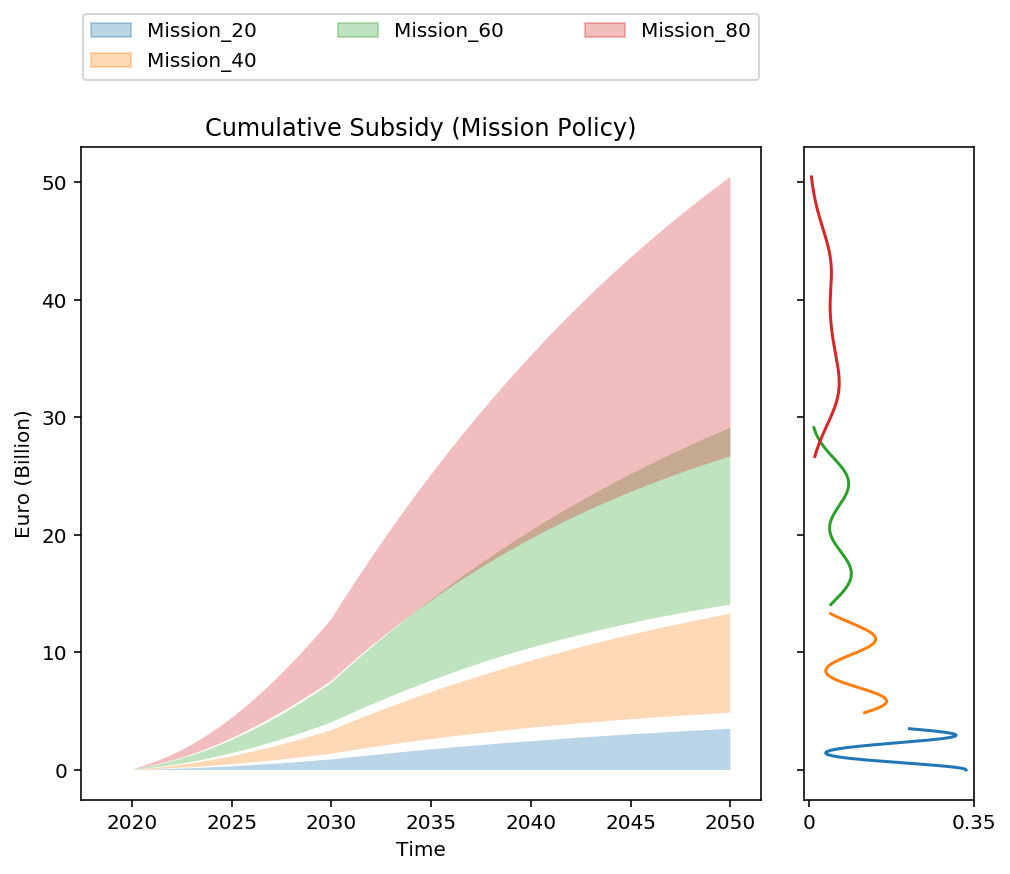

In [15]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total cumulative subsidies awarded', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_mission,
                titles={'total cumulative subsidies awarded':'Cumulative Subsidy (Mission Policy)'},
                ylabels={'total cumulative subsidies awarded':'Euro (Billion)'}
                     )
# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_Awarded_Subsidies_(Mission_policy).png', dpi=300, bbox_inches = "tight")
plt.show()


## 4. Grouped by subsidy plot

### 4.1. Co2

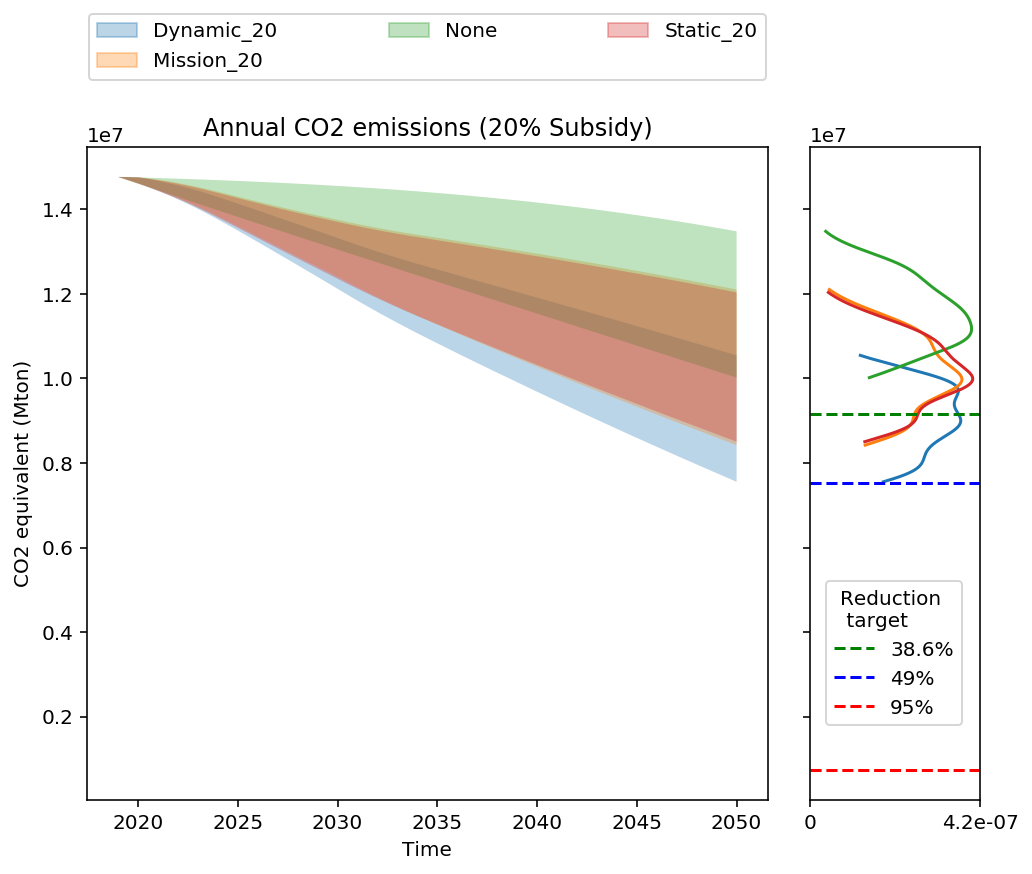

In [16]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total CO2 emission', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_20,
                titles={'total CO2 emission':'Annual CO2 emissions (20% Subsidy)'},
                ylabels={'total CO2 emission':'CO2 equivalent (Mton)'}
                     )

# plot targets  and legend
line1 = plt.axhline(y=(1-.38) * outcomes['total CO2 emission'].max(), color='g', linestyle='--')
line3 = plt.axhline(y=0.05 * outcomes['total CO2 emission'].max(), color='r', linestyle='--')
line2= plt.axhline(y=0.51 * outcomes['total CO2 emission'].max(), color='b', linestyle='--')
plt.legend((line1, line2, line3), ('38.6%','49%', '95%'),title='Reduction \n target',loc='best',bbox_to_anchor=(0.95,.35))
plt.legend()

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Annual_CO2_emissions(20_Subsidy).png', dpi=300, bbox_inches = "tight")
plt.show()

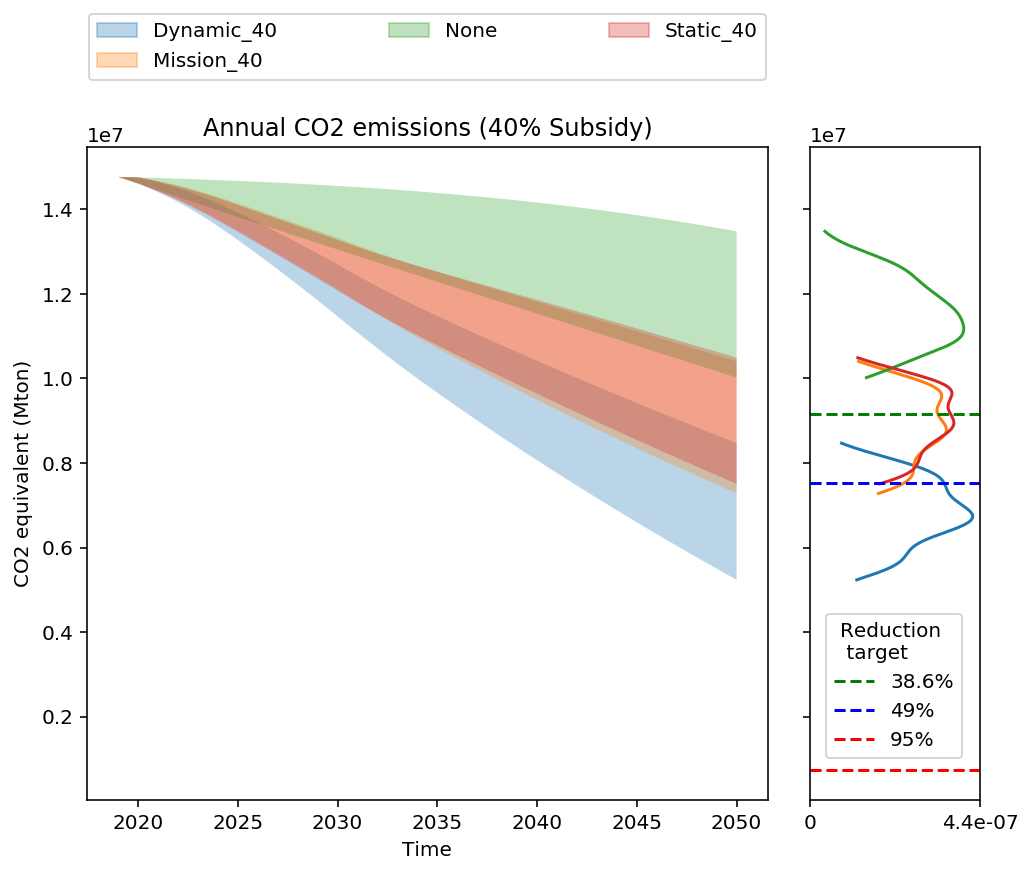

In [17]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total CO2 emission', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_40,
                titles={'total CO2 emission':'Annual CO2 emissions (40% Subsidy)'},
                ylabels={'total CO2 emission':'CO2 equivalent (Mton)'}
                     )

# plot targets  and legend
line1 = plt.axhline(y=(1-.38) * outcomes['total CO2 emission'].max(), color='g', linestyle='--')
line3 = plt.axhline(y=0.05 * outcomes['total CO2 emission'].max(), color='r', linestyle='--')
line2= plt.axhline(y=0.51 * outcomes['total CO2 emission'].max(), color='b', linestyle='--')
plt.legend((line1, line2, line3), ('38.6%','49%', '95%'),title='Reduction \n target',loc='best',bbox_to_anchor=(0.95,.3))
plt.legend()

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Annual_CO2_emissions(40_Subsidy).png', dpi=300, bbox_inches = "tight")
plt.show()


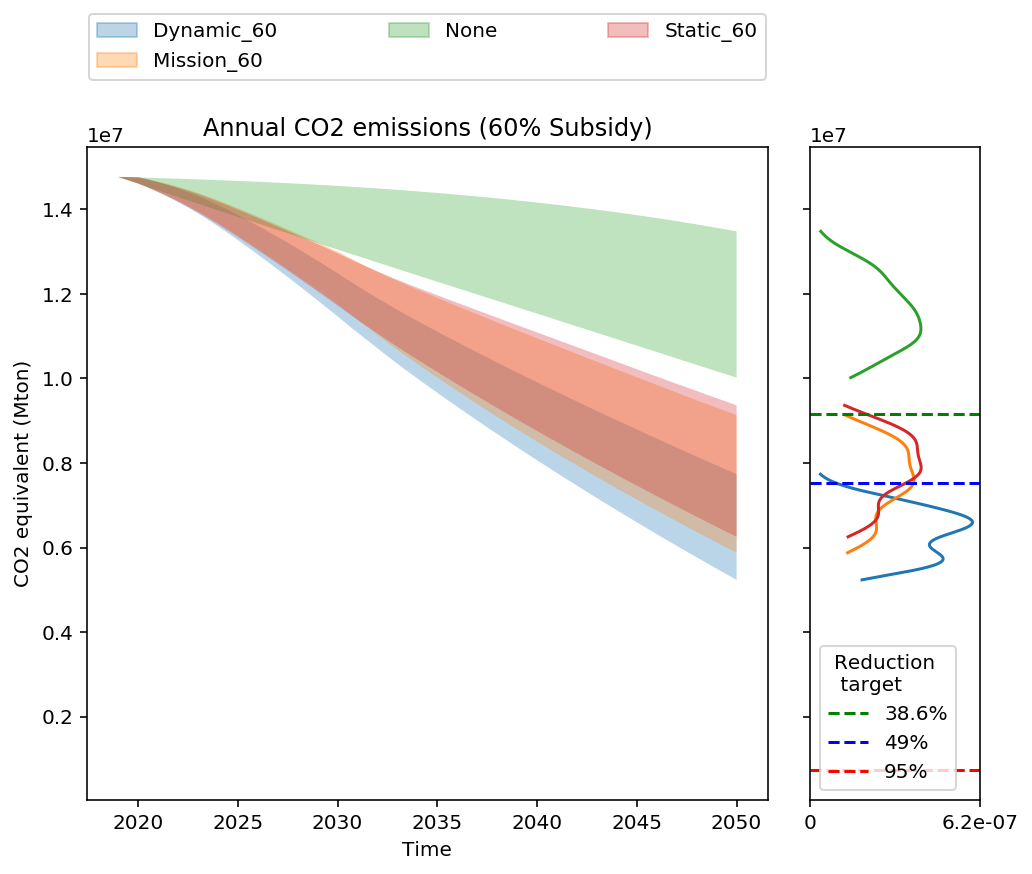

In [18]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total CO2 emission', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_60,
                titles={'total CO2 emission':'Annual CO2 emissions (60% Subsidy)'},
                ylabels={'total CO2 emission':'CO2 equivalent (Mton)'}
                     )

# plot targets  and legend
line1 = plt.axhline(y=(1-0.38) * outcomes['total CO2 emission'].max(), color='g', linestyle='--')
line3 = plt.axhline(y=0.05 * outcomes['total CO2 emission'].max(), color='r', linestyle='--')
line2= plt.axhline(y=0.51 * outcomes['total CO2 emission'].max(), color='b', linestyle='--')
plt.legend((line1, line2, line3), ('38.6%','49%', '95%'),title='Reduction \n target',loc='best')
plt.legend()


# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Annual_CO2_emissions(60_Subsidy).png', dpi=300, bbox_inches = "tight")
plt.show()

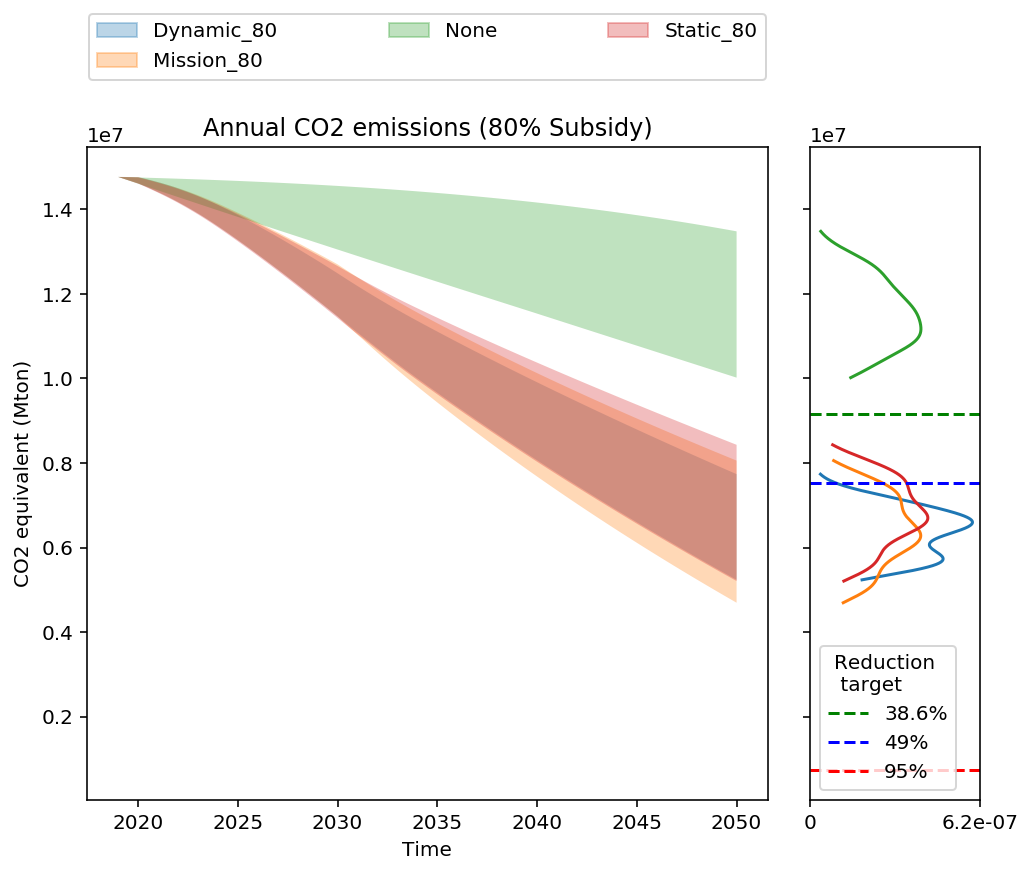

In [19]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total CO2 emission', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_80,
                titles={'total CO2 emission':'Annual CO2 emissions (80% Subsidy)'},
                ylabels={'total CO2 emission':'CO2 equivalent (Mton)'}
                     )

# plot targets  and legend
line1 = plt.axhline(y=(1-.38) * outcomes['total CO2 emission'].max(), color='g', linestyle='--')
line3 = plt.axhline(y=0.05 * outcomes['total CO2 emission'].max(), color='r', linestyle='--')
line2= plt.axhline(y=0.51 * outcomes['total CO2 emission'].max(), color='b', linestyle='--')
plt.legend((line1, line2, line3), ('38.6%','49%', '95%'),title='Reduction \n target',loc='best')
plt.legend()


# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Annual_CO2_emissions(80_Subsidy).png', dpi=300, bbox_inches = "tight")
plt.show()

The plot shows a positive relationship between subsidy percentage (in the policies) and the amount of CO2 reduced.

### 4.2. Cumulative subsidies

In [20]:
# Drop policy None from groups as it skews results in KDE

pol_20.remove('None')
pol_40.remove('None')
pol_60.remove('None')
pol_80.remove('None')

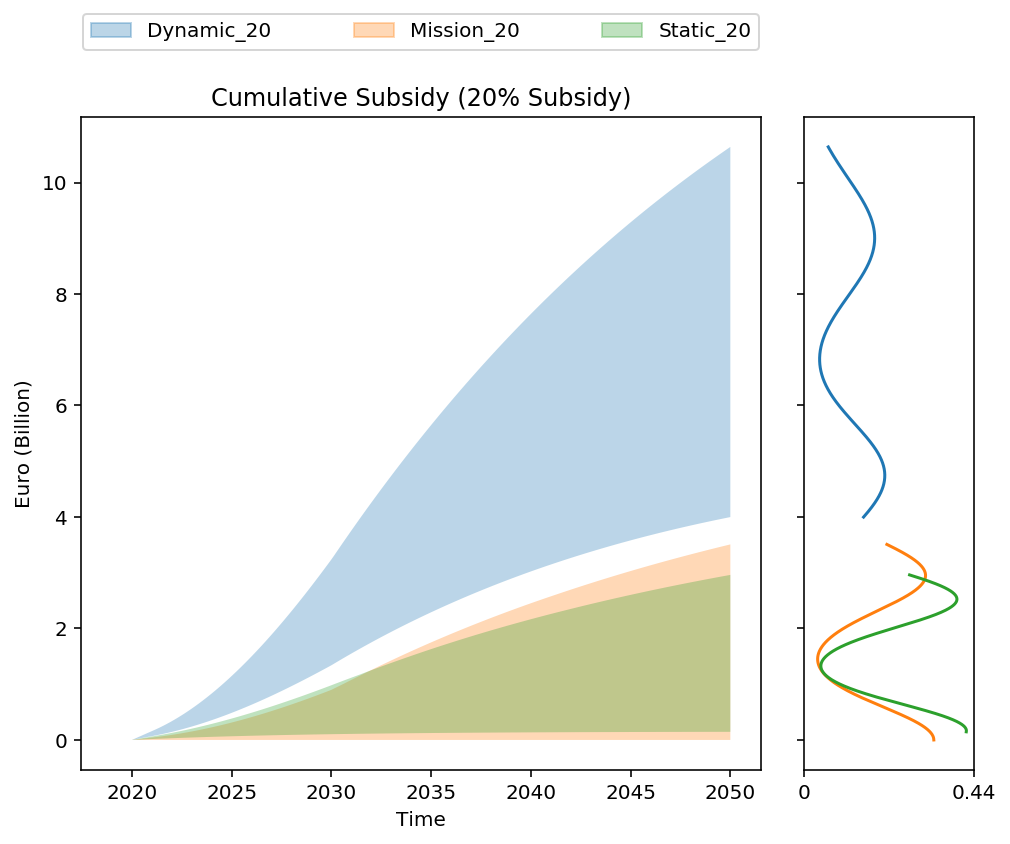

In [21]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total cumulative subsidies awarded', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_20,
                titles={'total cumulative subsidies awarded':'Cumulative Subsidy (20% Subsidy)'},
                ylabels={'total cumulative subsidies awarded':'Euro (Billion)'}
                     )

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_Awarded_Subsidies(20_subsidies).png', dpi=300, bbox_inches = "tight")
plt.show()

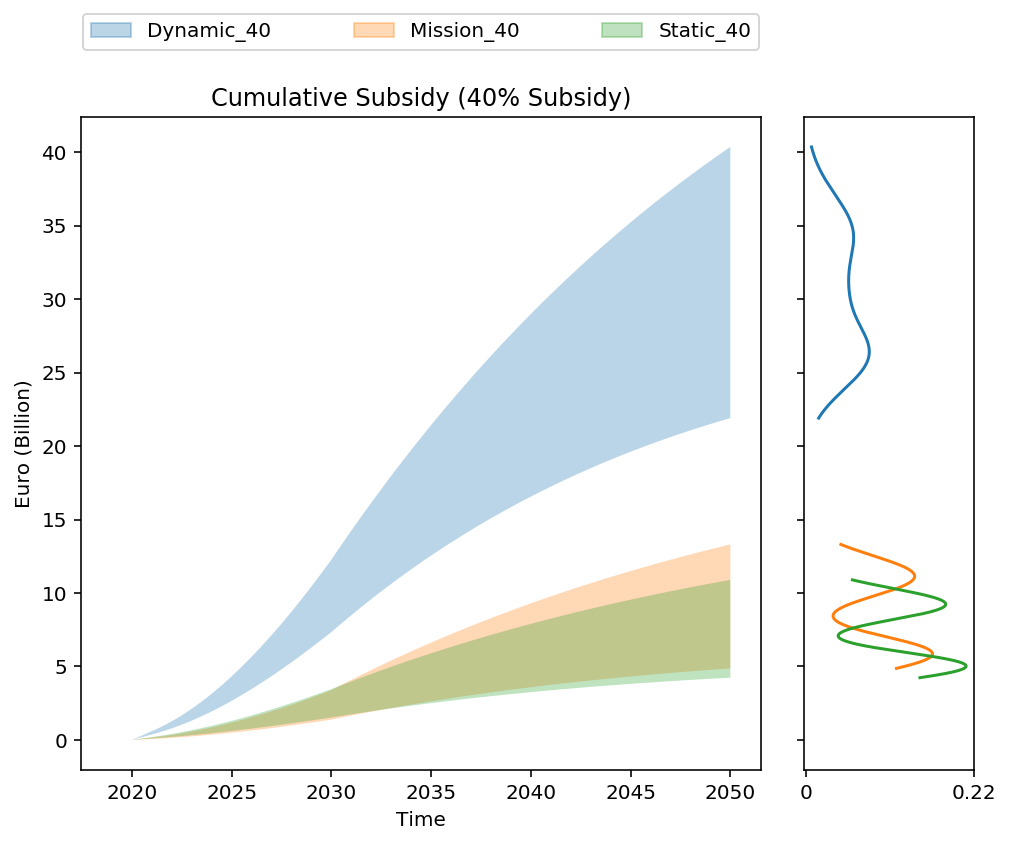

In [22]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total cumulative subsidies awarded', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_40,
                titles={'total cumulative subsidies awarded':'Cumulative Subsidy (40% Subsidy)'},
                ylabels={'total cumulative subsidies awarded':'Euro (Billion)'}
                     )
# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_Awarded_Subsidies_(40_subsidies).png', dpi=300, bbox_inches = "tight")
plt.show()

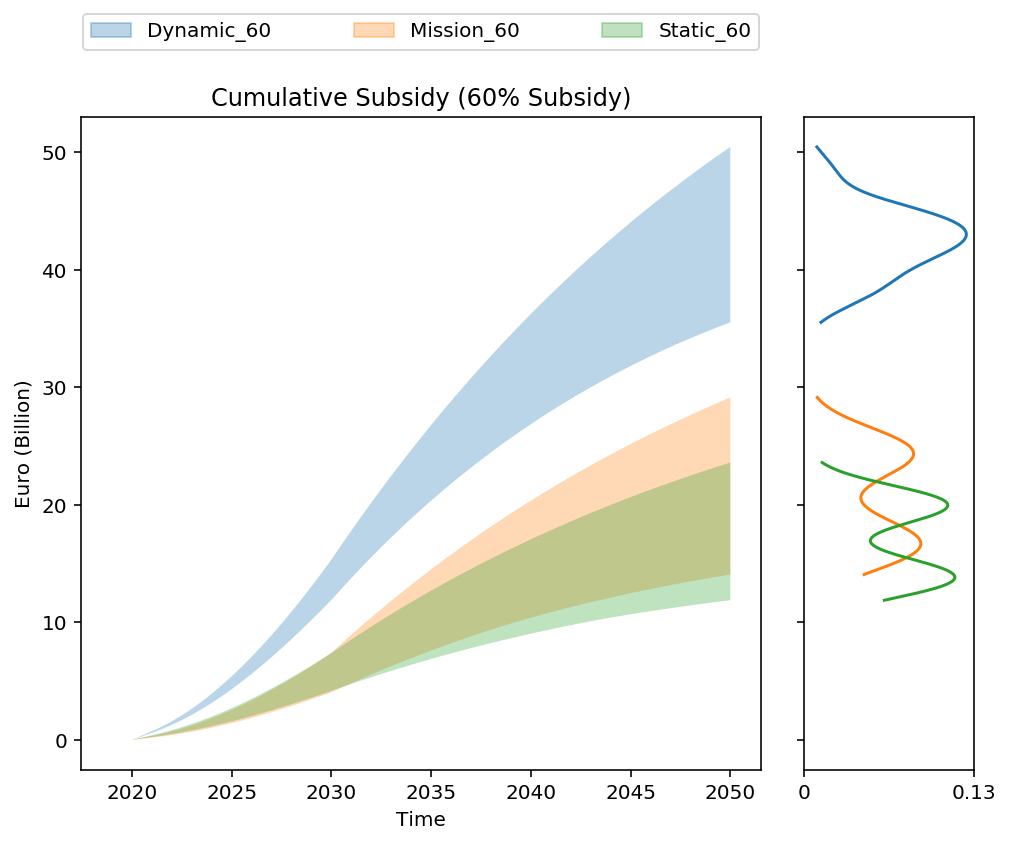

In [23]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total cumulative subsidies awarded', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_60,
                titles={'total cumulative subsidies awarded':'Cumulative Subsidy (60% Subsidy)'},
                ylabels={'total cumulative subsidies awarded':'Euro (Billion)'}
                     )
# plot subsidy budget up to 2030 (3.5e9)
# x = np.arange(2020,2031,1)
# y = 3.5e8 + 3.5e8*(x-2020)
# line1 = axes['total cumulative subsidies awarded'].plot(x, y, 'r', label='subsidy')
# axes['total cumulative subsidies awarded'].legend((line1),title='Subsidy budget')

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_Awarded_Subsidies(60_subsidies).png', dpi=300, bbox_inches = "tight")
plt.show()


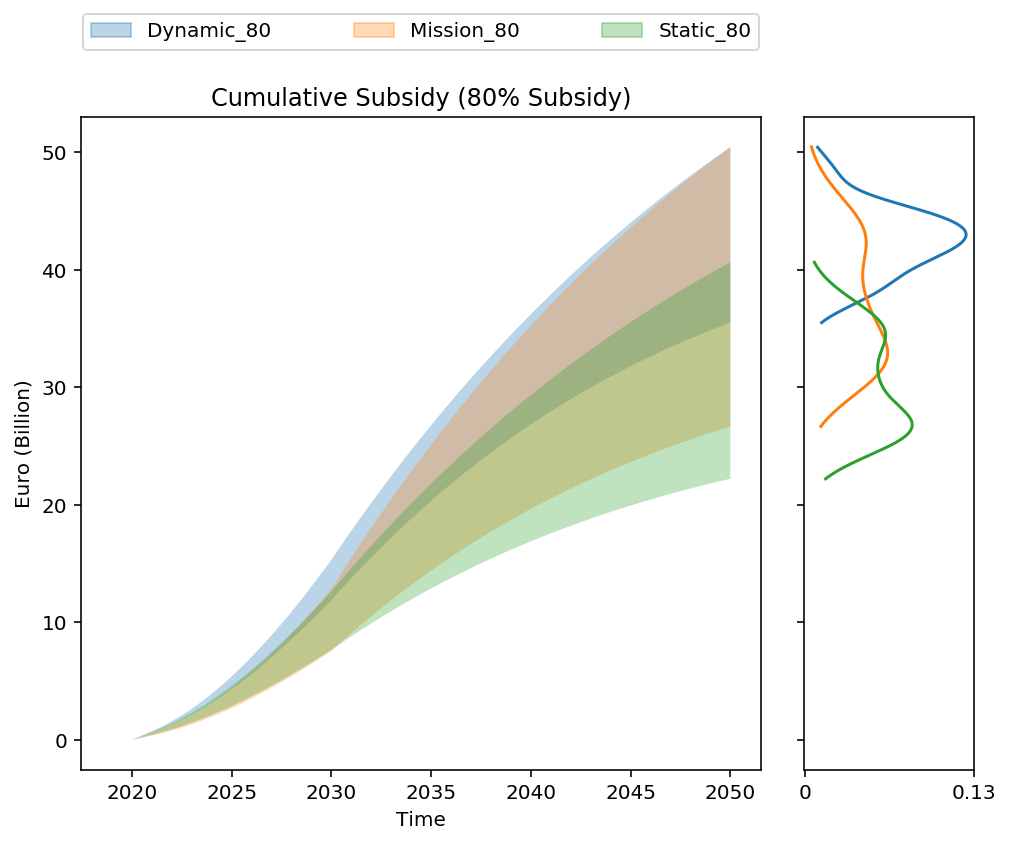

In [24]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total cumulative subsidies awarded', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_80,
                titles={'total cumulative subsidies awarded':'Cumulative Subsidy (80% Subsidy)'},
                ylabels={'total cumulative subsidies awarded':'Euro (Billion)'}

                     )
# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_Awarded_Subsidies_(80_subsidies).png', dpi=300, bbox_inches = "tight")
plt.show()


### 4.3 Renovated houses

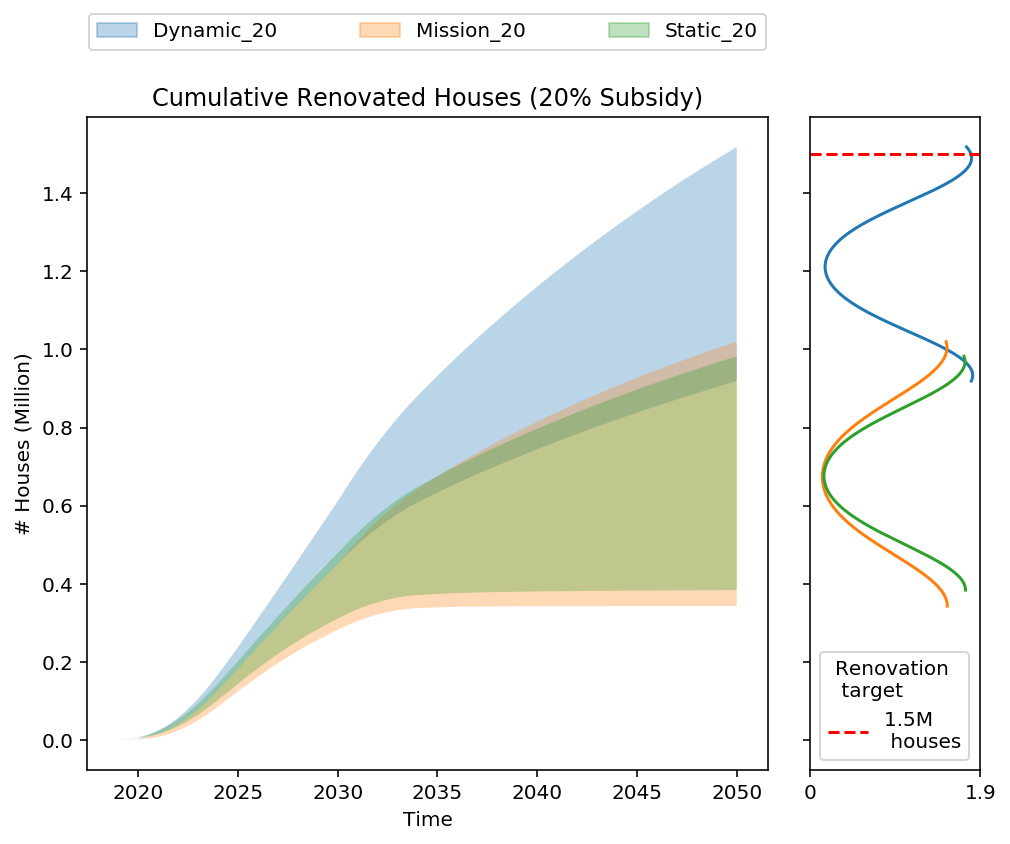

In [25]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total renovated houses', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_20,
                titles={'total renovated houses':'Cumulative Renovated Houses (20% Subsidy)'},
                ylabels={'total renovated houses':'# Houses (Million)'}
                     )
line1 = plt.axhline(y=1.5, color='red', linestyle='--', label='1.5M \n houses')
plt.legend(title='Renovation \n target')

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_renovated_houses(20_subsidies).png', dpi=300, bbox_inches = "tight")
plt.show()


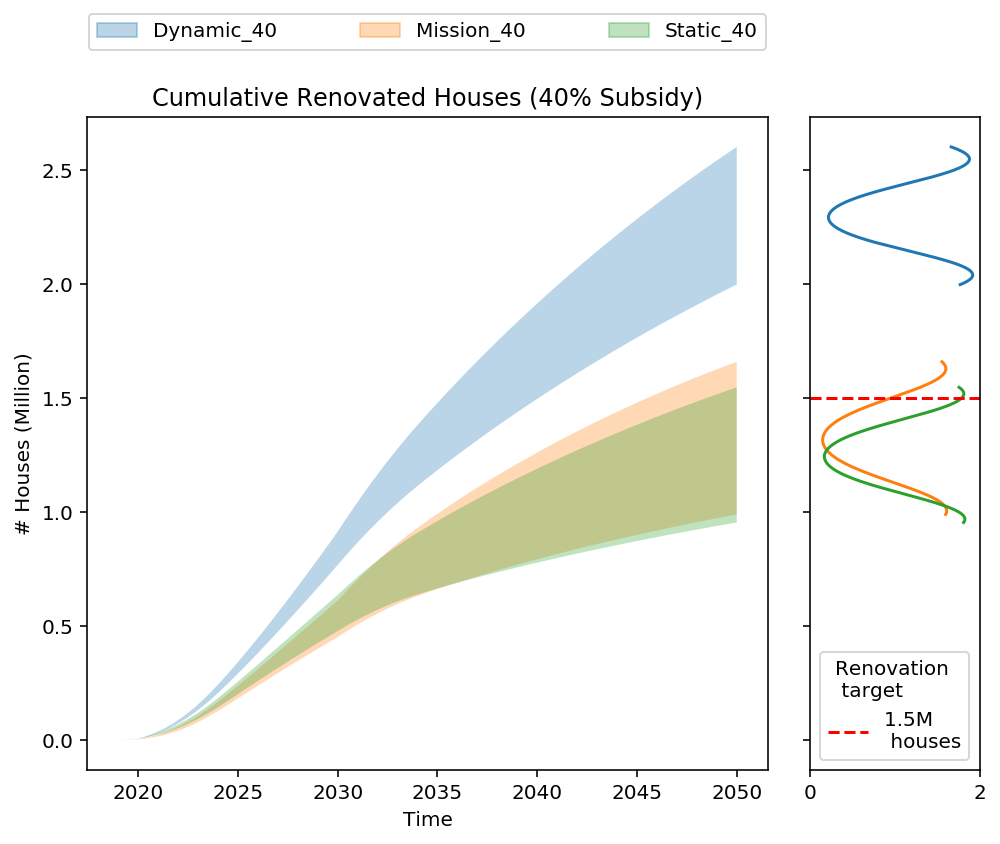

In [26]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total renovated houses', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_40,
                titles={'total renovated houses':'Cumulative Renovated Houses (40% Subsidy)'},
                ylabels={'total renovated houses':'# Houses (Million)'}
                     )
line1 = plt.axhline(y=1.5, color='red', linestyle='--', label='1.5M \n houses')
plt.legend(title='Renovation \n target')

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_renovated_houses(40_subsidies).png', dpi=300, bbox_inches = "tight")
plt.show()


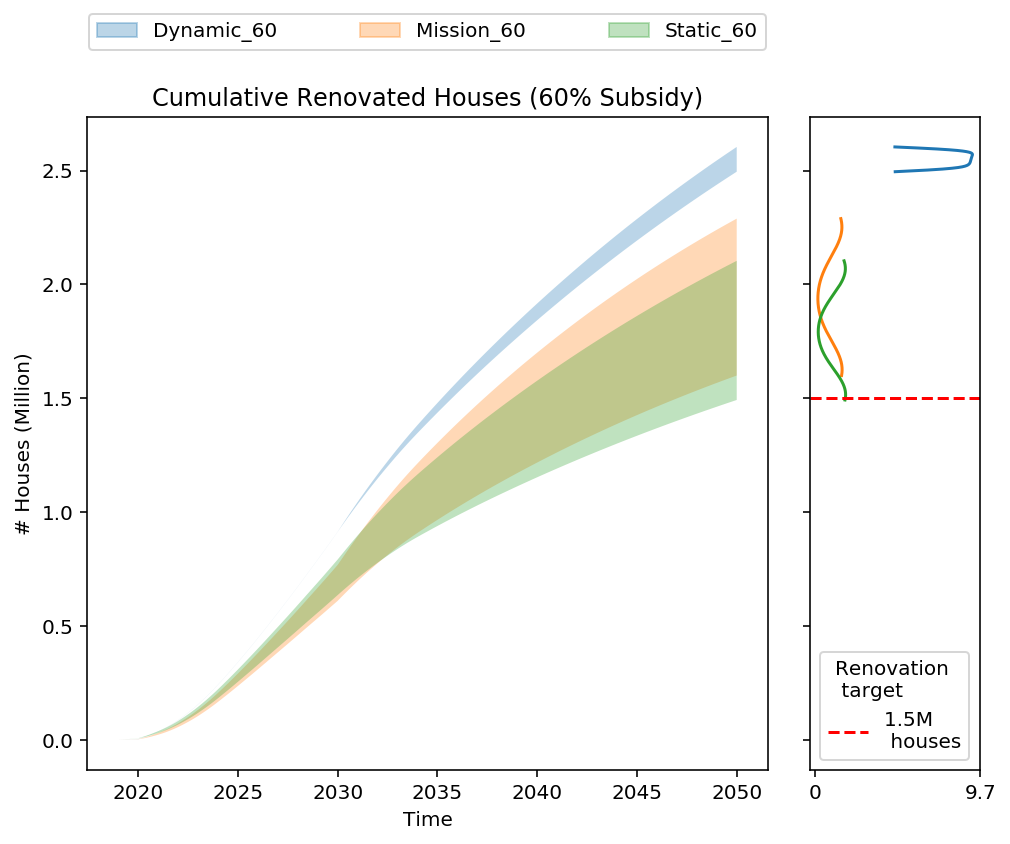

In [27]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total renovated houses', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_60,
                titles={'total renovated houses':'Cumulative Renovated Houses (60% Subsidy)'},
                ylabels={'total renovated houses':'# Houses (Million)'}
                     )
line1 = plt.axhline(y=1.5, color='red', linestyle='--', label='1.5M \n houses')
plt.legend(title='Renovation \n target')
# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_renovated_houses(60_subsidies).png', dpi=300, bbox_inches = "tight")
plt.show()


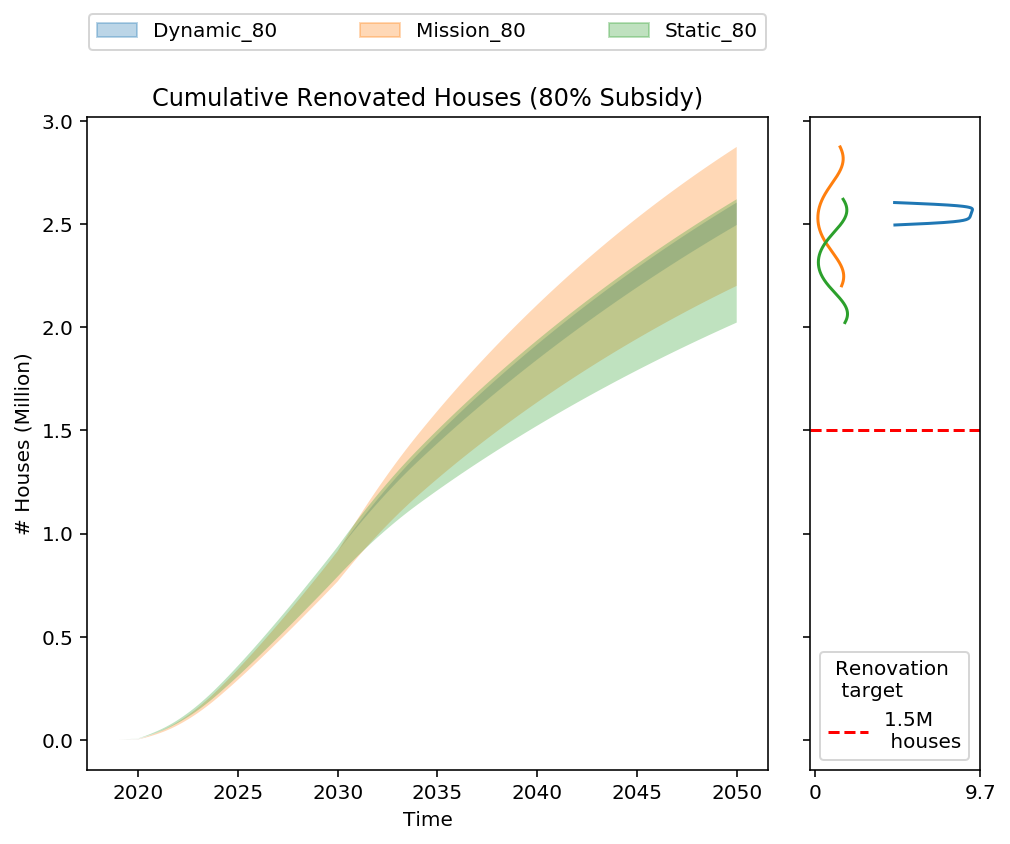

In [28]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total renovated houses', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_80,
                titles={'total renovated houses':'Cumulative Renovated Houses (80% Subsidy)'},
                ylabels={'total renovated houses':'# Houses (Million)'}
                     )
line1 = plt.axhline(y=1.5, color='red', linestyle='--', label='1.5M \n houses')
plt.legend(title='Renovation \n target')

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_renovated_houses(80_subsidies).png', dpi=300, bbox_inches = "tight")
plt.show()


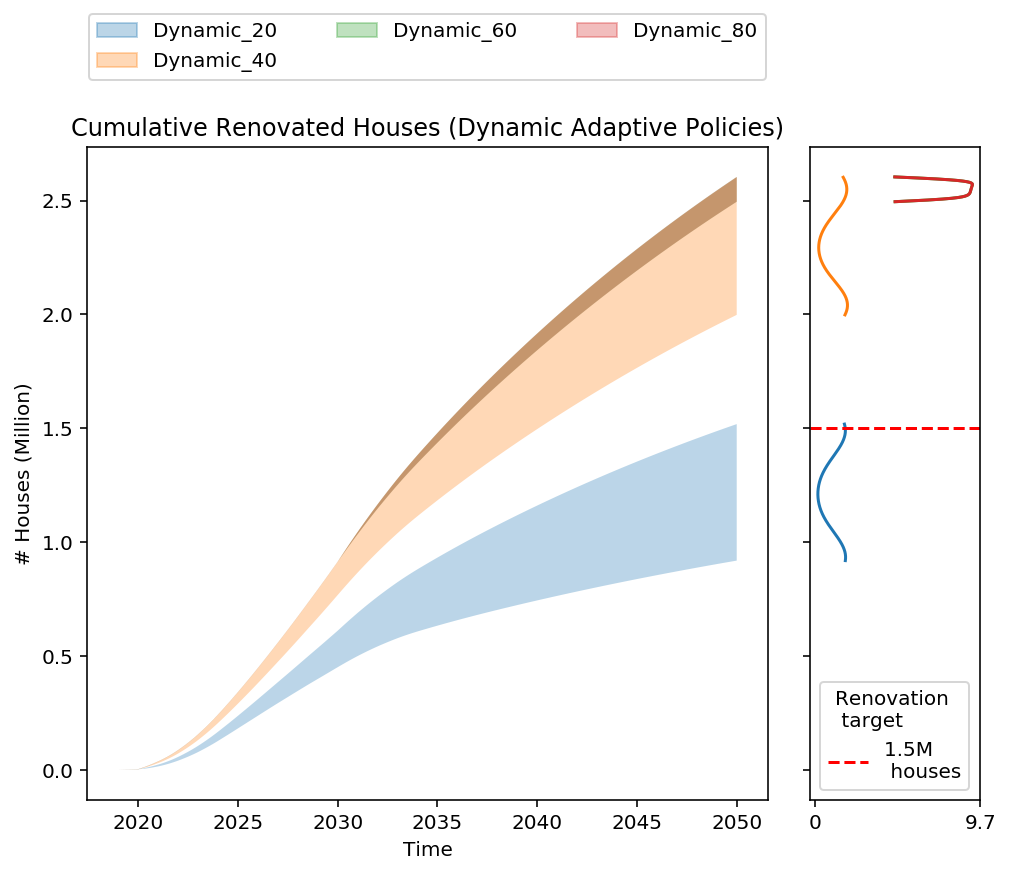

In [29]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total renovated houses', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_dynamic,
                titles={'total renovated houses':'Cumulative Renovated Houses (Dynamic Adaptive Policies)'},
                ylabels={'total renovated houses':'# Houses (Million)'}
                     )
line1 = plt.axhline(y=1.5, color='red', linestyle='--', label='1.5M \n houses')
plt.legend(title='Renovation \n target')

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_renovated_houses(Dynamic).png', dpi=300, bbox_inches = "tight")
plt.show()


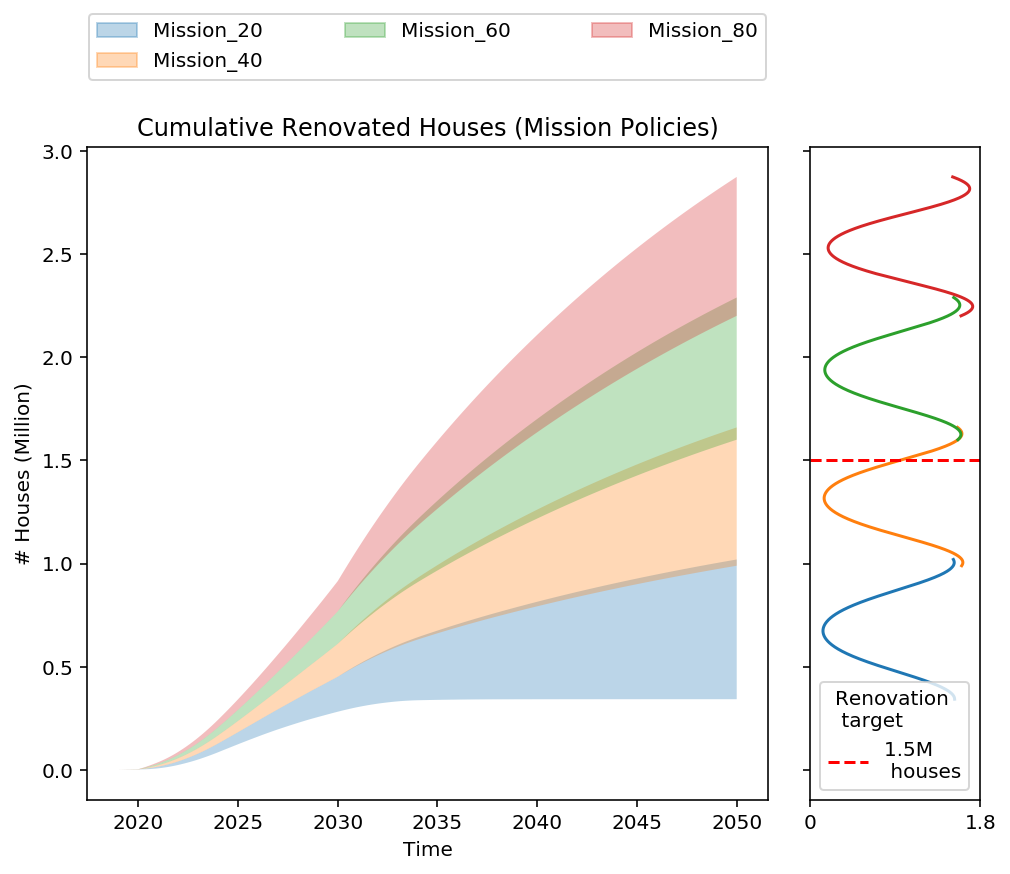

In [30]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total renovated houses', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_mission,
                titles={'total renovated houses':'Cumulative Renovated Houses (Mission Policies)'},
                ylabels={'total renovated houses':'# Houses (Million)'}
                     )
line1 = plt.axhline(y=1.5, color='red', linestyle='--', label='1.5M \n houses')
plt.legend(title='Renovation \n target')

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_renovated_houses(Mission).png', dpi=300, bbox_inches = "tight")
plt.show()


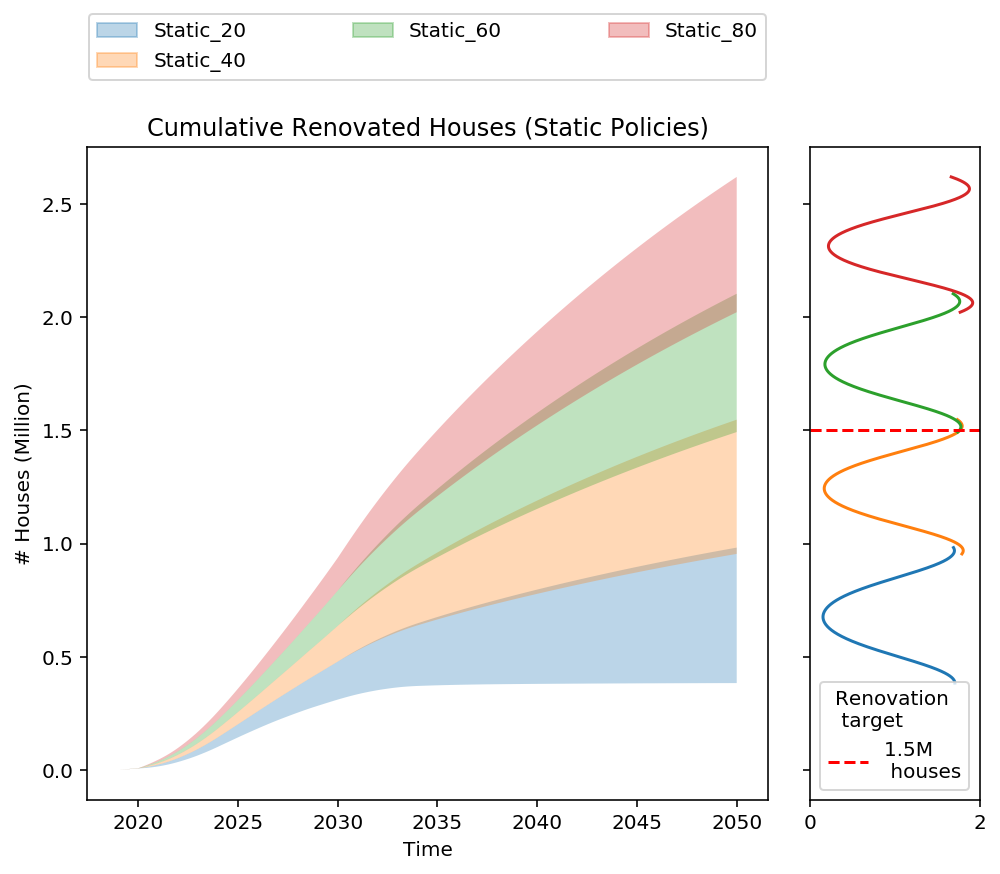

In [31]:
fig, axes = envelopes(results=results,
                density=KDE, 
                outcomes_to_show='total renovated houses', 
                fill=True, 
                group_by='policy',
                grouping_specifiers= pol_static,
                titles={'total renovated houses':'Cumulative Renovated Houses (Static Policies)'},
                ylabels={'total renovated houses':'# Houses (Million)'}
                     )
line1 = plt.axhline(y=1.5, color='red', linestyle='--', label='1.5M \n houses')
plt.legend(title='Renovation \n target')

# Save
fig.set_size_inches(8,6)
plt.savefig('plots/scenario_policies/Envelope_Cumulative_renovated_houses(Static).png', dpi=300, bbox_inches = "tight")
plt.show()


[MainProcess/WARNING] key error in do_ylabels, no ylabel provided for `total cumulative subsidies awarded`
[MainProcess/WARNING] key error in do_titles, no title provided for `total cumulative subsidies awarded`


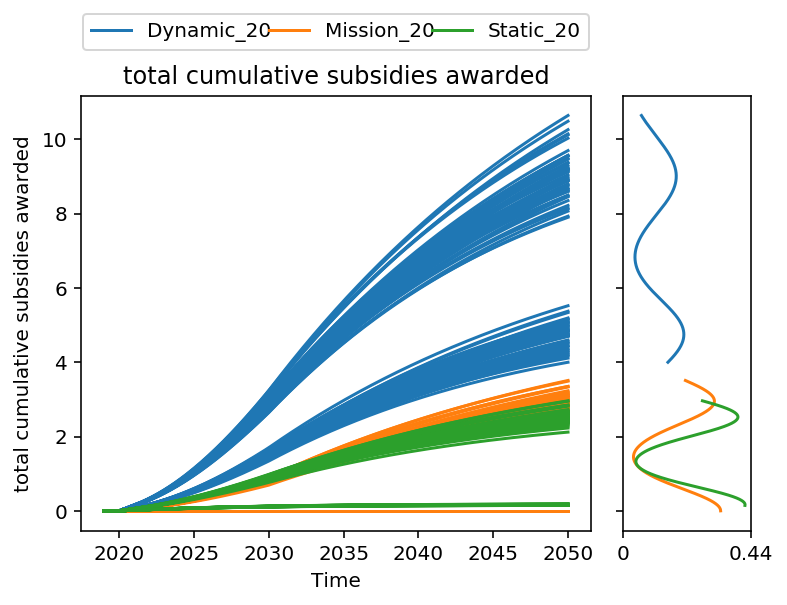

In [32]:
fig, axes = lines(results=results,
                density=KDE, 
                outcomes_to_show='total cumulative subsidies awarded', 
                group_by='policy',
                grouping_specifiers= pol_20,
                titles={'total CO2 emission':'Cumulative Renovated Houses (Static Policies)'},
                ylabels={'total CO2 emission':'# Houses'}
                     )
plt.show()

### Create table of outcomes


In [63]:
outcomes_for_table = ['total CO2 emission',
                      'total cumulative subsidies awarded',
                      'total renovated houses']


In [137]:
outcomes['total CO2 emission'].max()

14765408.0

In [130]:
d = []
for policy in policies:
    selected_results = tu.slice_results(experiments=experiments, outcomes=outcomes, policy=policy)
    d.append({'Policy': policy, 
              'Annual CO2 emission min': selected_results[1]['total CO2 emission'].min(), 
              'Annual CO2 emission max': selected_results[1]['total CO2 emission'].max(), 
              'Annual CO2 emission mean': selected_results[1]['total CO2 emission'].mean(),
              'Cumulative subsidies awarded min': selected_results[1]['total cumulative subsidies awarded'].min(), 
              'Cumulative subsidies awarded max': selected_results[1]['total cumulative subsidies awarded'].max(), 
              'Cumulative subsidies awarded mean': selected_results[1]['total cumulative subsidies awarded'].mean(), 
              'Cumulative renovated houses min': selected_results[1]['total renovated houses'].min(), 
              'Cumulative renovatead houses max': selected_results[1]['total renovated houses'].max(),
              'Cumulative renovatead houses mean': selected_results[1]['total renovated houses'].mean()
             })


In [192]:
import pandas as pd
df_table = pd.DataFrame(d)

# add seperate columns for policy and percentage
df_table['Percentage']= df_table['Policy'].str.split("_",1).str[1]
df_table['Policy']= df_table['Policy'].str.split("_",1).str[0]
# Calculate reduction
df_table['Mean CO2 reduction'] = df_table['Annual CO2 emission max'] - df_table['Annual CO2 emission mean']
df_table['Maximum CO2 reduction'] = df_table['Annual CO2 emission max'] - df_table['Annual CO2 emission min']

In [193]:
# Beautify the table


df_table['Mean CO2 reduction'] = df_table['Mean CO2 reduction']/1e6
df_table['Maximum CO2 reduction'] = df_table['Maximum CO2 reduction']/1e6

df_table = df_table.rename(columns={'Mean CO2 reduction':'Mean CO2 reduction [Mton]',
                         'Maximum CO2 reduction': 'Maximum CO2 reduction [Mton]',
                         'Cumulative renovatead houses max':'Cumulative renovated houses max [M houses]',
                         'Cumulative renovatead houses mean':'Cumulative renovated houses mean [M houses]',
                         'Cumulative subsidies awarded max':'Cumulative subsidies awarded max [Billion euros]',
                         'Cumulative subsidies awarded mean':'Cumulative subsidies awarded mean [Billion euros]'
                        })
df_table.drop(['Annual CO2 emission max', 
               'Annual CO2 emission mean',
               'Annual CO2 emission min',
               'Cumulative renovated houses min',
               'Cumulative subsidies awarded min'], 
              inplace=True, axis=1)

In [196]:
# rearrange
cols = df_table.columns.tolist()
cols = cols[-2:] + cols[:-2]
df_table = df_table[cols]
df_table

,Policy,Percentage,Mean CO2 reduction [Mton],Maximum CO2 reduction [Mton],Cumulative renovated houses max [M houses],Cumulative renovated houses mean [M houses],Cumulative subsidies awarded max [Billion euros],Cumulative subsidies awarded mean [Billion euros]
0,Static,40,2.939828,7.258255,1.547244,0.696646,10.894588,3.655211
1,Dynamic,80,4.181880,9.530335,2.603651,1.306148,50.443469,21.314507
2,Static,80,3.969878,9.559074,2.619571,1.205295,40.653967,15.395988
3,None,NaN,1.486250,4.747432,0.161051,0.084759,2.511862,1.223181
4,Mission,60,3.567050,8.888918,2.288859,1.004981,29.132988,9.830192
5,Mission,20,2.388709,6.344406,1.019654,0.413463,3.507677,0.708797
6,Dynamic,40,3.936263,9.530335,2.602112,1.185199,40.354693,15.090002
7,Static,60,3.464768,8.512401,2.103567,0.957108,23.597537,8.570260
8,Dynamic,60,4.181880,9.530335,2.603651,1.306148,50.443469,21.314507
9,Dynamic,20,2.897626,7.210981,1.518462,0.671174,10.638348,3.456620


In [197]:
df_final = df_table.groupby(['Policy', 'Percentage']).mean().round(2)
df_final

Mean CO2 reduction [Mton]  Maximum CO2 reduction [Mton]  \
Policy  Percentage                                                            
Dynamic 20                               2.90                          7.21   
        40                               3.94                          9.53   
        60                               4.18                          9.53   
        80                               4.18                          9.53   
Mission 20                               2.39                          6.34   
        40                               2.98                          7.49   
        60                               3.57                          8.89   
        80                               4.13                         10.07   
Static  20                               2.41                          6.26   
        40                               2.94                          7.26   
        60                               3.46                          8.51   
        80                               3.97                          9.56   

                    Cumulative renovated houses max [M houses]  \
Policy  Percentage                                               
Dynamic 20                                                1.52   
        40                                                2.60   
        60                                                2.60   
        80                                                2.60   
Mission 20                                                1.02   
        40                                                1.66   
        60                                                2.29   
        80                                                2.87   
Static  20                                                0.98   
        40                                                1.55   
        60                                                2.10   
        80                                                2.62   

                    Cumulative renovated houses mean [M houses]  \
Policy  Percentage                                                
Dynamic 20                                                 0.67   
        40                                                 1.19   
        60                                                 1.31   
        80                                                 1.31   
Mission 20                                                 0.41   
        40                                                 0.71   
        60                                                 1.00   
        80                                                 1.28   
Static  20                                                 0.43   
        40                                                 0.70   
        60                                                 0.96   
        80                                                 1.21   

                    Cumulative subsidies awarded max [Billion euros]  \
Policy  Percentage                                                     
Dynamic 20                                                     10.64   
        40                                                     40.35   
        60                                                     50.44   
        80                                                     50.44   
Mission 20                                                      3.51   
        40                                                     13.31   
        60                                                     29.13   
        80                                                     50.47   
Static  20                                                      2.96   
        40                                                     10.89   
        60                                                     23.60   
        80                                                     40.65   

                    Cumulative subsidies

In [198]:
df_final.to_clipboard()